# Car Price Predection System

In [68]:
import pandas as pd

In [69]:
df = pd.read_csv('train-data.csv')


## Exploring Datasets

In [70]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Remove the unnamed colum.

In [71]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [72]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [73]:
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [74]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### let's remove the column 'New_Price' because of it's higher null values and other null values of 'Engine', 'Power', 'Seats' and 'Mileage'

In [75]:
df.drop('New_Price',axis=1,inplace=True)

In [76]:
df.shape

(6019, 12)

In [77]:
df.dropna(inplace=True)

In [78]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [79]:
df.shape

(5975, 12)

In [81]:
df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [83]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [84]:
df.shape

(5975, 12)

In [85]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### Explore the unique vlaues

In [86]:
columns=['Location','Fuel_Type','Transmission','Owner_Type','Seats']

In [87]:
for unique in columns:
    values=df[unique].unique()
    print(f'{unique}:{values}')

Location:['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Fuel_Type:['CNG' 'Diesel' 'Petrol' 'LPG']
Transmission:['Manual' 'Automatic']
Owner_Type:['First' 'Second' 'Fourth & Above' 'Third']
Seats:[ 5.  7.  8.  4.  6.  2. 10.  9.  0.]


### Here columns 'Mileage','Engine', 'Power' have units after the numerical  values so let's remove the units

In [88]:
df['Mileage'] = df['Mileage'].str.split().str[0].astype(float)
df = df.rename(columns={'Mileage': 'Mileage (kmpl)'})

In [89]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


In [90]:
df['Power'][76]

'null bhp'

### Here this is creating the problem to change the date from object type to numeric type. So let's check all the rows and remove it.

In [91]:
count=0
for i in df['Power']:
    if i == 'null bhp':
        count=count+1
print("Total 'null bhp' values:",count)


Total 'null bhp' values: 103


In [92]:
# Remove the 'null nph' values
df = df[df['Power'] != 'null bhp']

In [93]:

df['Power'] = df['Power'].str.split().str[0].astype(float)
# Rename
df = df.rename(columns={'Power': 'Power (bhp)'})

In [94]:
df['Engine'] = df['Engine'].str.split().str[0].astype(float)
# Rename
df=df.rename(columns={'Engine':'Engine (CC)'})

In [95]:
df=df.rename(columns={'Price':'Price (lakhs)'})

In [96]:
# df=df.rename(columns={'Engine':'Engine (CC)'})

In [97]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price (lakhs)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage (kmpl)     5872 non-null   float64
 8   Engine (CC)        5872 non-null   float64
 9   Power (bhp)        5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price (lakhs)      5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage (kmpl)     5872 non-null   float64
 8   Engine (CC)        5872 non-null   float64
 9   Power (bhp)        5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price (lakhs)      5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [100]:
df.describe()

,Year,Kilometers_Driven,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price (lakhs)
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


## Data visualization

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price (lakhs)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


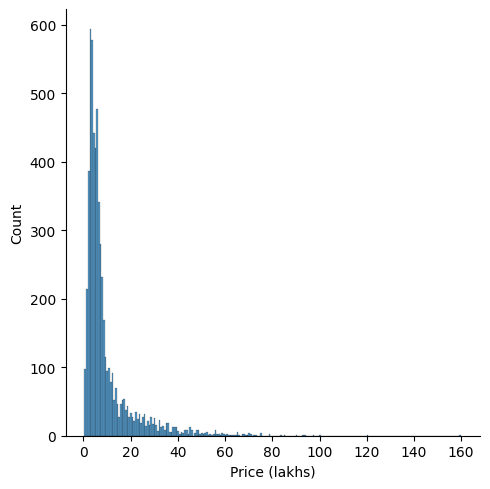

In [103]:
sns.displot(df['Price (lakhs)'])

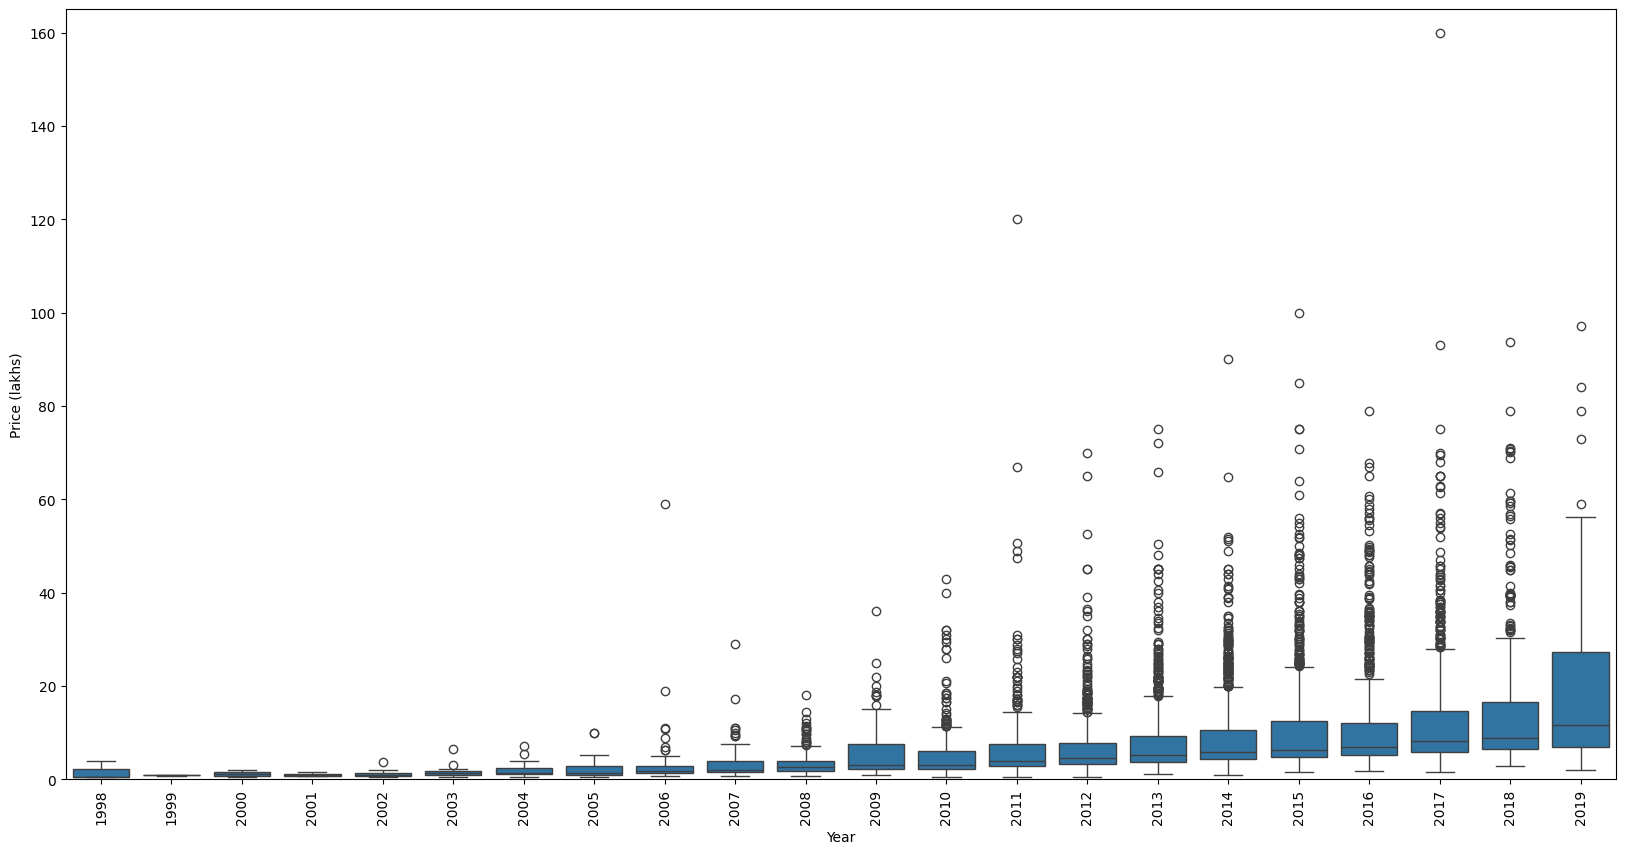

In [104]:
var = 'Year'
data = pd.concat([df['Price (lakhs)'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price (lakhs)", data=data)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

#### Price of Newest is high compared to old models

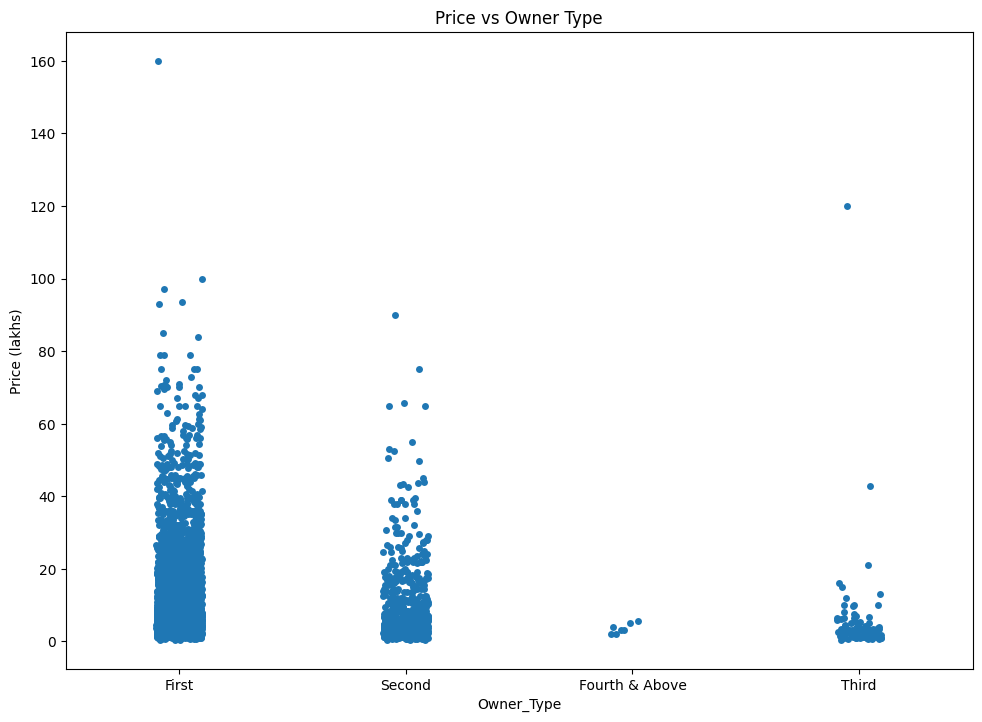

In [105]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price (lakhs)', data = df)
plt.title("Price vs Owner Type")
plt.show()

### Price from the first owner is high compared to second, third or fourth owners

In [106]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price (lakhs)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [107]:
df['Company'] = df['Name'].str.split().str[0]

/var/folders/tz/x4nyk_3177g_wk1rwy7nsjcm0000gn/T/ipykernel_9770/2568532071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df)


<Figure size 2000x1000 with 0 Axes>

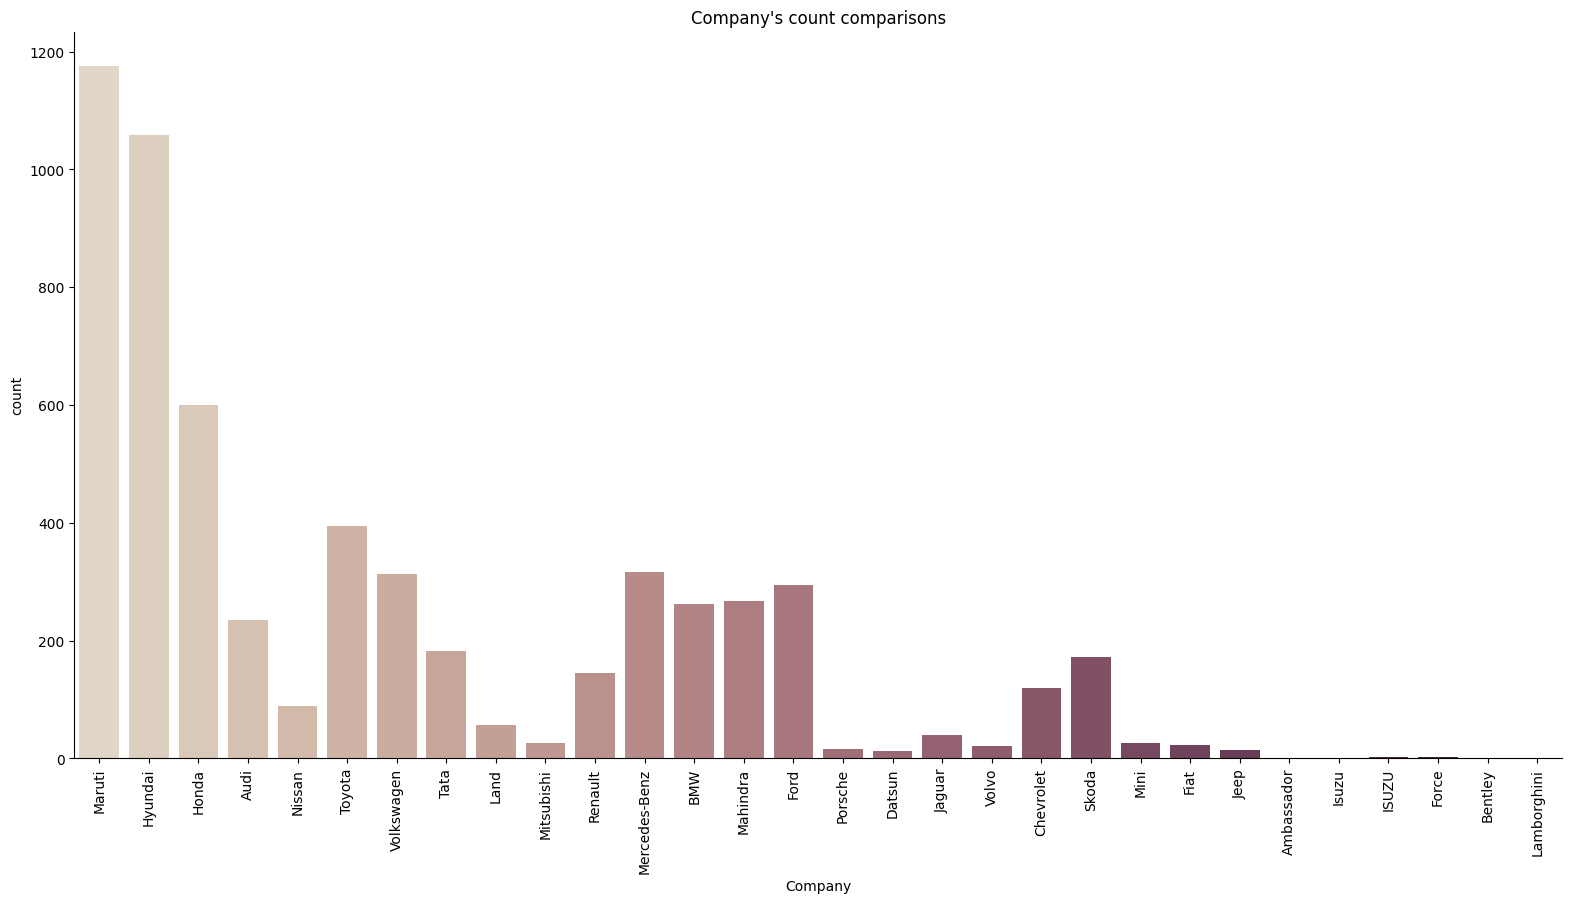

In [108]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df)
plt.xticks(rotation=90)
plt.title("Company's count comparisons")
plt.show()

## Working with Categorical Data

#### For hadeling categorical data. We mainly use these 2 path:

- OneHotEncoder
- LabelEncoder
Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

So, for each Features we will use plots to find out what to be used there

### Working with Location

In [118]:
# use one hot encoding for location data'


Location = pd.get_dummies(df[['Location']],drop_first=True).astype(int)
df = pd.concat([df,Location], axis=1)
Location.head()
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
# Location = encoder.fit_transform(df[['Location']])
# Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


### Working with fule-type

In [116]:
Fuel_Type = pd.get_dummies(df[['Fuel_Type']],drop_first=True).astype(int)
df = pd.concat([df, Fuel_Type], axis=1)
Fuel_Type.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


## Working with transmission

In [119]:
Transmission = pd.get_dummies(df[['Transmission']],drop_first=True).astype(int)
df = pd.concat([df,Transmission], axis=1)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


### Working with owner type

In [112]:
# As Owner_Type column has ordered data so we will be using Label Encoding Finally 
df.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
df.head()

/var/folders/tz/x4nyk_3177g_wk1rwy7nsjcm0000gn/T/ipykernel_9770/1374832954.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price (lakhs),Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,Audi


### Working with company

In [113]:
df['Company'].value_counts()

Company
Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

### Since we got a lot of variation so lets drop this column

In [114]:
df.drop(["Company"],axis=1,inplace=True)
df.drop(["Name"],axis=1,inplace=True)

In [120]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,...,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,...,0,0,0,0,0,0,0,1,0,1
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,0,0,0,1,1
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,...,1,0,0,0,0,0,0,0,0,1
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,...,1,0,0,0,0,0,0,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,...,0,1,0,0,0,0,0,0,0,0


#### Drop other columns because we have alredy done encoding of those columns

In [ ]:
df.drop(["Location","Fuel_Type","Transmission"],axis=1,inplace=True)


,Year,Kilometers_Driven,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price (lakhs),Fuel_Type_Diesel,Fuel_Type_LPG,...,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual
0,2010,72000,1,26.60,998.0,58.16,5.0,1.75,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,1,0,...,0,0,0,0,0,0,0,0,1,1
2,2011,46000,1,18.20,1199.0,88.70,5.0,4.50,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,1,0,...,1,0,0,0,0,0,0,0,0,1
4,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,1,0,...,0,1,0,0,0,0,0,0,0,0


### finally train data is ready.

In [124]:
df.head()

,Year,Kilometers_Driven,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price (lakhs),Fuel_Type_Diesel,Fuel_Type_LPG,...,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual
0,2010,72000,1,26.60,998.0,58.16,5.0,1.75,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,1,0,...,0,0,0,0,0,0,0,0,1,1
2,2011,46000,1,18.20,1199.0,88.70,5.0,4.50,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,1,0,...,1,0,0,0,0,0,0,0,0,1
4,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,1,0,...,0,1,0,0,0,0,0,0,0,0


In [126]:
df.shape

(5872, 22)

##  Features Selection

In [130]:
X=df.drop('Price (lakhs)',axis=1)
print(X.shape)
print(X.columns)

(5872, 21)
Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage (kmpl)',
       'Engine (CC)', 'Power (bhp)', 'Seats', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Transmission_Manual'],
      dtype='object')


In [134]:
y=df[['Price (lakhs)']]
y.head()

,Price (lakhs)
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


### Look for the similar type of data and if found remove thme with the help of correlation

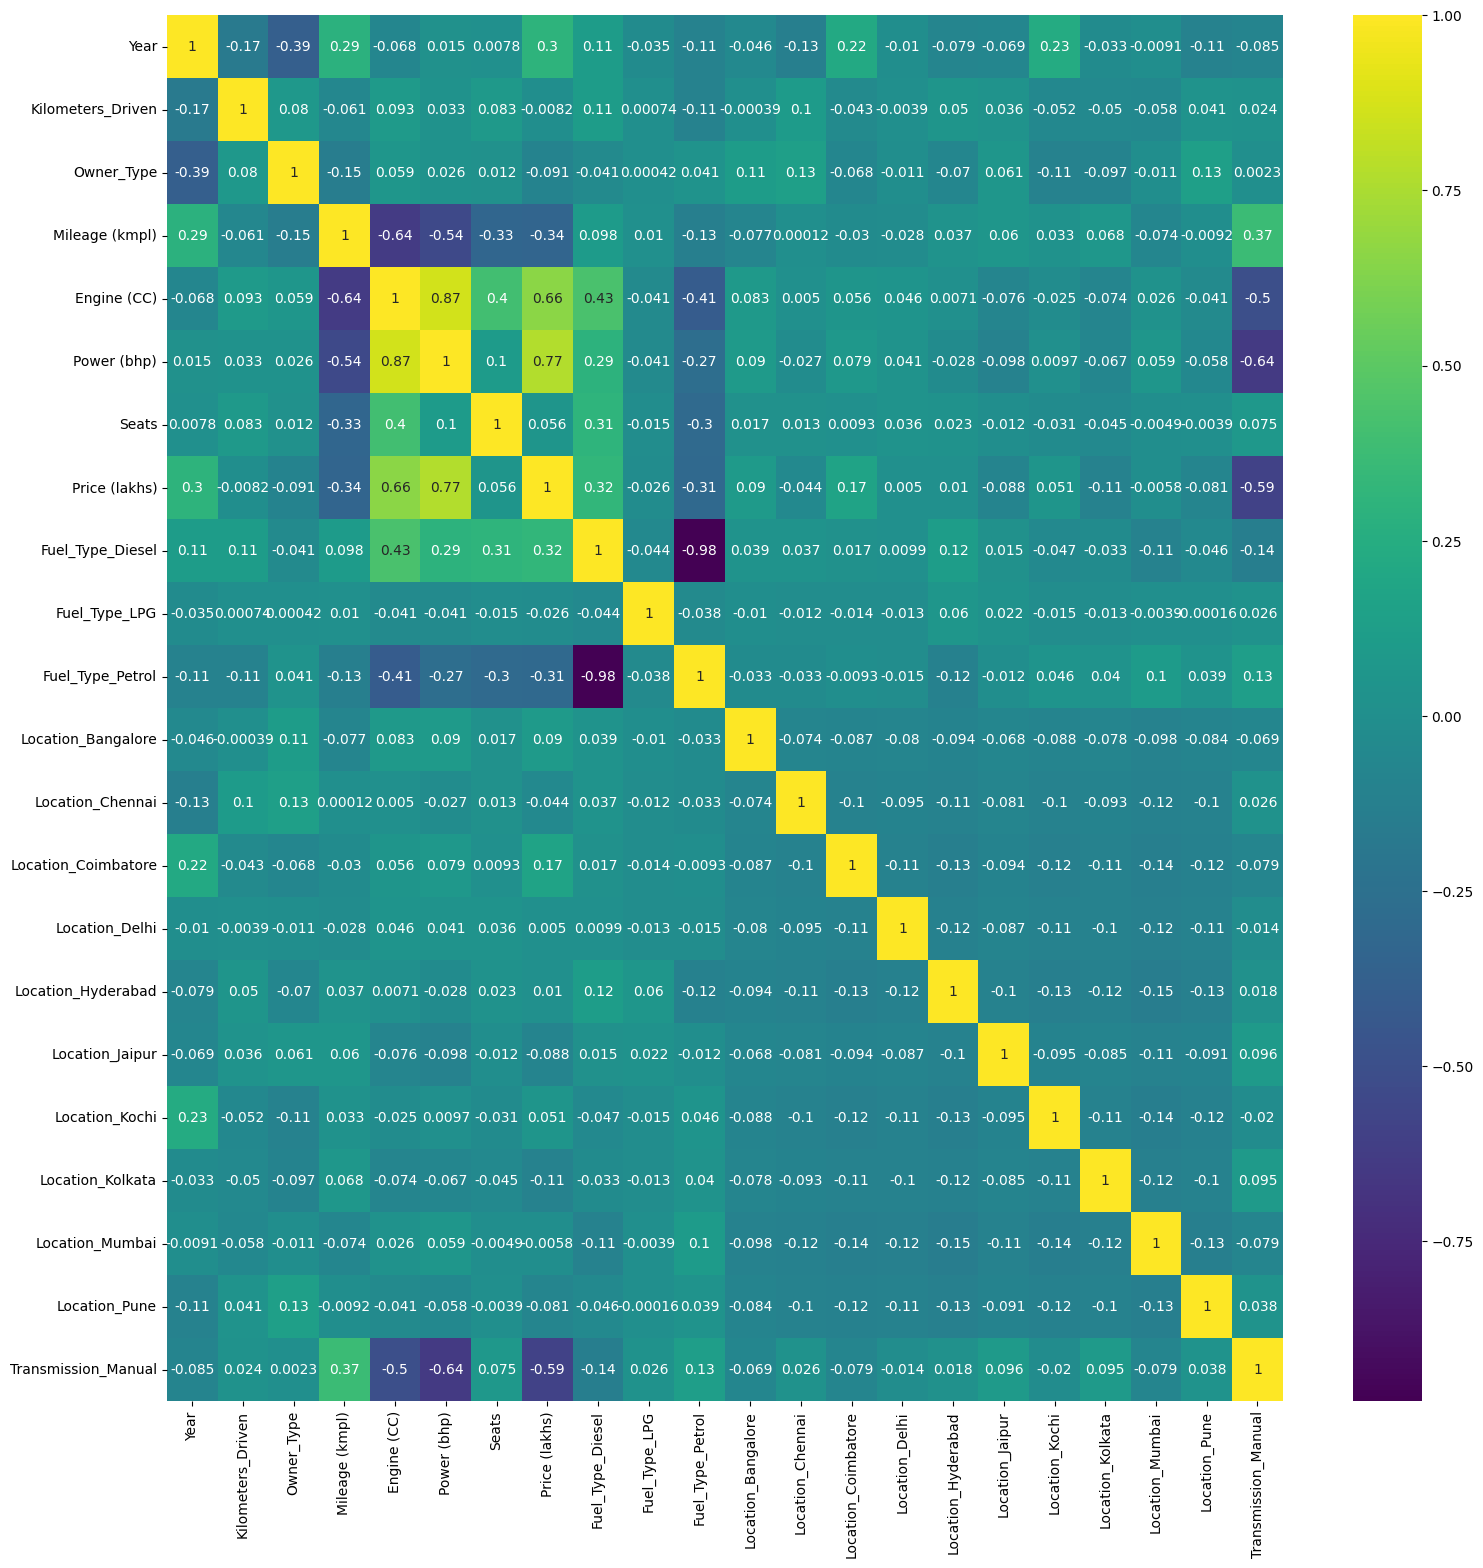

In [137]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

# Build the model

### Split the data

In [138]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4404, 21), (1468, 21), (4404, 1), (1468, 1))

In [148]:
y_test

,Price (lakhs)
4204,31.00
605,12.50
205,19.90
456,8.92
1303,24.68
...,...
2914,6.50
3051,56.00
5135,7.40
615,17.50


### Let's use Linear Regression for model building

In [141]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
lr_predection= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.718292770806169
Accuracy on Testing set:  0.6597998520207273


In [150]:
lr_predection.shape

(1468, 1)

In [ ]:
pred_df = pd.DataFrame({
    'Actual Value(lakhs)': y_test.values.ravel(),
    'Predicted Value(lakhs)': lr_predection.ravel()
})


,Actual Value(lakhs),Predicted Value(lakhs)
0,31.00,30.254592
1,12.50,13.212733
2,19.90,22.476061
3,8.92,9.571321
4,24.68,22.213841
...,...,...
1463,6.50,3.775943
1464,56.00,33.331358
1465,7.40,9.832262
1466,17.50,17.720310


In [164]:
import numpy as np

In [165]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, lr_predection)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_predection)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MSE: 36.42
RMSE: 6.03
R²: 0.6598


### We got low accuracty so lets try Random Forest Regressor

In [171]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
randomforest_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))


/Users/sabnamgurung/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy on Traing set:  0.9850024875359622
Accuracy on Testing set:  0.8655462713536924


In [172]:
pred_df = pd.DataFrame({
    'Actual Value(lakhs)': y_test.values.ravel(),
    'Predicted Value(lakhs)': randomforest_pred.ravel()
})
pred_df

,Actual Value(lakhs),Predicted Value(lakhs)
0,31.00,19.853600
1,12.50,10.892300
2,19.90,22.102333
3,8.92,8.893900
4,24.68,16.159200
...,...,...
1463,6.50,4.260000
1464,56.00,62.655800
1465,7.40,7.459400
1466,17.50,17.424600


### Metrices

In [173]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, randomforest_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, randomforest_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, randomforest_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, randomforest_pred))

		Error Table
Mean Absolute Error      :  1.5608573350525499
Mean Squared  Error      :  14.39413120426498
Root Mean Squared  Error :  3.79395983166203
R Squared Error          :  0.8655462713536924
